In [1]:
# KNN
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
y = data['Purchased'].values
x = data[['Gender', 'Age', 'EstimatedSalary']]

In [4]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
knnmodel = KNeighborsClassifier(n_neighbors = 3)
knnmodel.fit(x_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [5]:
y_pred = knnmodel.predict(x_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [6]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[42,  6],
       [10, 22]])

Text(58.222222222222214, 0.5, 'Truth')

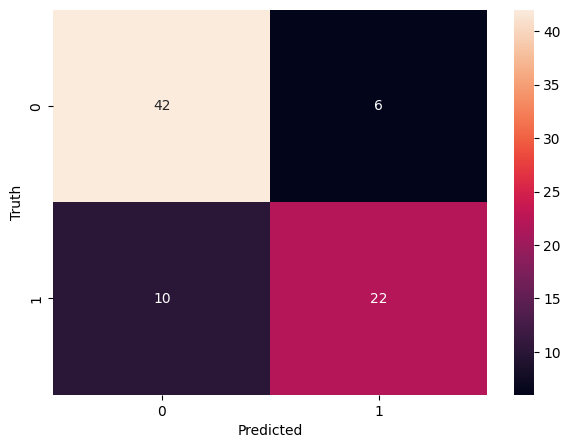

In [7]:
plt.figure(figsize = (7,5))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [8]:
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: ",acc * 100,"%")

error_rate = 1 - acc
print("Error Rate: ",error_rate * 100,"%")

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision: ",precision * 100,"%")

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall: ",recall * 100,"%")

Model Accuracy:  80.0 %
Error Rate:  19.999999999999996 %
Precision:  78.57142857142857 %
Recall:  68.75 %


In [ ]:
# Optional
def make_prediction():
    gender_input = input("Enter Gender (Male/Female): ").strip().lower()
    age_input = int(input("Enter Age: "))
    salary_input = int(input("Enter Estimated Salary: "))
    
    # Convert gender to numerical value
    gender = 0 if gender_input == 'male' else 1
    
    # Create a DataFrame for the input
    input_data = pd.DataFrame([[gender, age_input, salary_input]], columns=['Gender', 'Age', 'EstimatedSalary'])
    
    # Make a prediction
    prediction = knnmodel.predict(input_data)
    
    # Display the result
    if prediction[0] == 1:
        print("Prediction: The person is likely to purchase the product.")
    else:
        print("Prediction: The person is not likely to purchase the product.")

# Call the function to make a prediction
make_prediction()